In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('data/train_storming_round.csv')

<Axes: title={'center': 'Class balance'}, xlabel='target'>

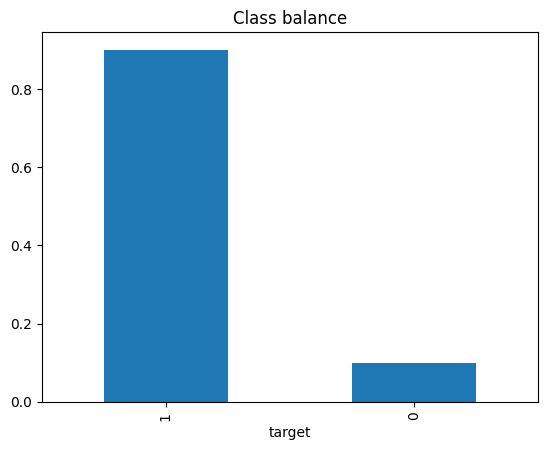

In [2]:

df["target"] = (df["new_policy_count"] > 0).astype(int)
df["target"].value_counts(normalize=True).plot.bar(title="Class balance")

In [3]:
date_cols = ["agent_join_month", "first_policy_sold_month", "year_month"]
for c in date_cols:
    df[c] = pd.to_datetime(df[c], format="%m/%d/%Y")

In [4]:
df["months_since_join"]      = (df["year_month"] - df["agent_join_month"]).dt.days
df["months_since_first_sale"] = (df["year_month"] - df["first_policy_sold_month"]).dt.days
df["quotations_per_customer"] = df["unique_quotations"] / df["unique_customers"]

In [5]:
#Split of Train data
cutoff = df["year_month"].quantile(0.8)
train = df[df["year_month"] <= cutoff].copy()
val   = df[df["year_month"] >  cutoff].copy()

X_train, y_train = train.drop(["target", "row_id"], axis=1), train["target"]
X_val,   y_val   = val.drop  (["target", "row_id"], axis=1),   val["target"]

In [12]:
from xgboost import XGBClassifier
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="auc",
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    early_stopping_rounds=50
)
model.fit(X_train, y_train,
          eval_set=[(X_val, y_val)],
          verbose=False)


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:agent_code: object, agent_join_month: datetime64[ns], first_policy_sold_month: datetime64[ns], year_month: datetime64[ns]

In [8]:
import xgboost
print(xgboost.__version__) 

3.0.0


In [9]:
from xgboost import XGBClassifier
import inspect
print("early_stopping_rounds" in inspect.signature(XGBClassifier.fit).parameters)

False


In [13]:
df["new_policy_count"]

0         0
1        25
2        26
3        18
4        20
         ..
15303    25
15304    15
15305    30
15306     0
15307    19
Name: new_policy_count, Length: 15308, dtype: int64